In [ ]:
'''

This was an experimental setup, with a y_train set of 1 column with 3 options (multiclass) targets

'''

In [44]:
import pandas as pd
from sqlalchemy import create_engine

sqlcon = create_engine('mssql+pyodbc://@' + 'GHOST-117\SQLEXPRESS' + '/' + 'MOHSIN' + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
# Now use SQL Query to bring in whatever - USE THIS QUERY TO BRING IN SPECIFIC DATA:
X_train1 = pd.read_sql_query("SELECT DISTINCT * FROM  [DRIVENDATA].[dbo].[watertable_X_train_PROCESSED]  ORDER BY ID", sqlcon)

'''
test single target column
'''
y_train1 = pd.read_sql_query("SELECT DISTINCT * FROM  [DRIVENDATA].[dbo].[watertable_y_train_ML]  ORDER BY ID", sqlcon)

#y_train1 = pd.read_sql_query("SELECT * FROM [DRIVENDATA].[dbo].[watertable_y_train_DL_exp] ORDER BY ID", sqlcon)


X_test1 = pd.read_sql_query("SELECT DISTINCT * FROM  [DRIVENDATA].[dbo].[watertable_X_test_PROCESSED]  ORDER BY ID", sqlcon)


In [45]:
dummies_ext = pd.get_dummies(X_train1.extraction_type_class2)
dummies_mgt = pd.get_dummies(X_train1.management2)
dummies_pay = pd.get_dummies(X_train1.payment_type2)
dummies_src = pd.get_dummies(X_train1.source2)
dummies_wtr = pd.get_dummies(X_train1.waterpoint_type2)

dummies_qtg = pd.get_dummies(X_train1.quantity_group)
dummies_qlg = pd.get_dummies(X_train1.quality_group)

# Dummy Trap: drop all the 'other' columns
dummies_ext2 = dummies_ext.drop(['other_ext'], axis='columns')
dummies_mgt2 = dummies_mgt.drop(['other_mgt'], axis='columns')
dummies_pay2 = dummies_pay.drop(['other_pay'], axis='columns')
dummies_src2 = dummies_src.drop(['other_src'], axis='columns')
dummies_wtr2 = dummies_wtr.drop(['other_wtr'], axis='columns')

#
dummies_qtg2 = dummies_qtg.drop(['unknown'], axis='columns')
dummies_qlg2 = dummies_qlg.drop(['unknown'], axis='columns')

# Combine
X_train2 = pd.concat([X_train1,dummies_ext2], axis='columns')
X_train3 = pd.concat([X_train2,dummies_mgt2], axis='columns')
X_train4 = pd.concat([X_train3,dummies_pay2], axis='columns')
X_train5 = pd.concat([X_train4,dummies_src2], axis='columns')
X_train6 = pd.concat([X_train5,dummies_wtr2], axis='columns')

#
X_train7 = pd.concat([X_train6,dummies_qtg2], axis='columns')
X_train8 = pd.concat([X_train7,dummies_qlg2], axis='columns')

In [46]:
'''
X TEST SET
'''
dummies_ext = pd.get_dummies(X_test1.extraction_type_class2)
dummies_mgt = pd.get_dummies(X_test1.management2)
dummies_pay = pd.get_dummies(X_test1.payment_type2)
dummies_src = pd.get_dummies(X_test1.source2)
dummies_wtr = pd.get_dummies(X_test1.waterpoint_type2)
#
dummies_qtg = pd.get_dummies(X_test1.quantity_group)
dummies_qlg = pd.get_dummies(X_test1.quality_group)

# Dummy Trap: drop all the 'other' columns
dummies_ext2 = dummies_ext.drop(['other_ext'], axis='columns')
dummies_mgt2 = dummies_mgt.drop(['other_mgt'], axis='columns')
dummies_pay2 = dummies_pay.drop(['other_pay'], axis='columns')
dummies_src2 = dummies_src.drop(['other_src'], axis='columns')
dummies_wtr2 = dummies_wtr.drop(['other_wtr'], axis='columns')
#
dummies_qtg2 = dummies_qtg.drop(['unknown'], axis='columns')
dummies_qlg2 = dummies_qlg.drop(['unknown'], axis='columns')

# Combine
X_test2 = pd.concat([X_test1,dummies_ext2], axis='columns')
X_test3 = pd.concat([X_test2,dummies_mgt2], axis='columns')
X_test4 = pd.concat([X_test3,dummies_pay2], axis='columns')
X_test5 = pd.concat([X_test4,dummies_src2], axis='columns')
X_test6 = pd.concat([X_test5,dummies_wtr2], axis='columns')
#
X_test7 = pd.concat([X_test6,dummies_qtg2], axis='columns')
X_test8 = pd.concat([X_test7,dummies_qlg2], axis='columns')

# Drop varchar labels (for X and y)
X_test9 = X_test8.drop(['ID','extraction_type_class2','management2','payment_type2','source2','waterpoint_type2','quantity_group','quality_group'], axis='columns')

In [47]:
# Drop varchar labels (for X and y)
X_train9 = X_train8.drop(['ID','extraction_type_class2','management2','payment_type2','source2','waterpoint_type2','quantity_group','quality_group'], axis='columns')
y_train2 = y_train1.drop(['ID'], axis='columns')

In [48]:
X_train9.head()

,WELL_AGE,POP_N,HEIGHT_N,PERMIT_0,PERMIT_1,gravity,handpump,motorpump,rope pump,submersible,...,improved spring,dry,enough,insufficient,seasonal,colored,fluoride,good,milky,salty
0,24,0.000,0.000000,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,12,0.020,0.714079,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,24,0.000,0.000000,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,21,0.025,0.591696,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,24,0.000,0.000000,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [49]:
y_train2.head()

,status_group_2
0,0
1,2
2,2
3,2
4,0


In [50]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
## 57988 samples, 51 columns
X_train9.shape

(57988, 52)

In [52]:
# for input layer:
X_train9.shape[1]

52

In [53]:
X_train9.head(5)

,WELL_AGE,POP_N,HEIGHT_N,PERMIT_0,PERMIT_1,gravity,handpump,motorpump,rope pump,submersible,...,improved spring,dry,enough,insufficient,seasonal,colored,fluoride,good,milky,salty
0,24,0.000,0.000000,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,12,0.020,0.714079,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,24,0.000,0.000000,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,21,0.025,0.591696,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,24,0.000,0.000000,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [84]:
y_train2

,status_group_2
0,0
1,2
2,2
3,2
4,0
...,...
57983,2
57984,2
57985,0
57986,0


In [93]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import losses

from keras.callbacks import History  ## for plotting loss metric across epochs
history = History()

model = Sequential()
model.add(Dense(50, activation="sigmoid", input_shape=(X_train9.shape[1],)))
model.add(Dense(75,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(3,activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy", # 'mse' , 'binary_crossentropy' , 'categorical_crossentropy'
              optimizer=keras.optimizers.Adam(learning_rate=0.01), # 'adam' ,  'rmsprop', 'SGD' , ''
              metrics=["accuracy"])  # 'accuracy' , 'mae'  , 'caetogrical_accuracy'

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 50)                2650      
_________________________________________________________________
dense_81 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_82 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_83 (Dense)             (None, 3)                 303       
Total params: 14,378
Trainable params: 14,378
Non-trainable params: 0
_________________________________________________________________


In [94]:
'''
Without Kfold - Quick Check of accuracy
'''
# batch size = number of training samples in every iteration
# callbacks for plotting loss metric across epochs
model.fit(X_train9, y_train2, epochs=10,callbacks=[history])

Epoch 1/10
57988/57988 [==============================] - 3s 48us/step - loss: 0.6970 - accuracy: 0.7140
Epoch 2/10
57988/57988 [==============================] - 2s 43us/step - loss: 0.6592 - accuracy: 0.7301
Epoch 3/10
57988/57988 [==============================] - 3s 45us/step - loss: 0.6436 - accuracy: 0.7372
Epoch 4/10
57988/57988 [==============================] - 3s 44us/step - loss: 0.6325 - accuracy: 0.7412
Epoch 5/10
57988/57988 [==============================] - 3s 47us/step - loss: 0.6236 - accuracy: 0.7451
Epoch 6/10
57988/57988 [==============================] - 3s 49us/step - loss: 0.6175 - accuracy: 0.7479
Epoch 7/10
57988/57988 [==============================] - 3s 49us/step - loss: 0.6110 - accuracy: 0.7509
Epoch 8/10
57988/57988 [==============================] - 3s 45us/step - loss: 0.6059 - accuracy: 0.7528
Epoch 9/10
57988/57988 [==============================] - 3s 45us/step - loss: 0.5995 - accuracy: 0.7555
Epoch 10/10
57988/57988 [==============================

In [83]:
### check output to see if its overfitting:
y_predicted = model.predict(X_test9)
result = pd.DataFrame(y_predicted)
result2 = pd.concat([result,X_test1.ID], axis='columns')
result2.head(10)

## each value is a probability percent:

,0,1,2,ID
0,0.240633,0.114704,0.644664,10
1,0.547513,0.014678,0.437809,13
2,0.428120,0.049282,0.522597,14
3,0.963002,0.009839,0.027159,29
4,0.301334,0.086760,0.611906,32
5,0.096285,0.048439,0.855276,37
6,0.502693,0.052133,0.445173,47
7,0.311269,0.064119,0.624612,53
8,0.378954,0.037601,0.583445,57
9,0.710845,0.055816,0.233339,58


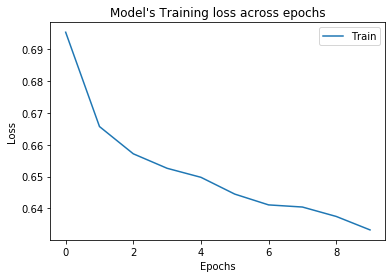

In [85]:
### Plotting the Loss Metric Across Epochs

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("Model's Training loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.show()

In [38]:
model.evaluate(X_train9, y_train2)

57988/57988 [==============================] - 2s 31us/step


[0.3383979632458091, 0.8618766069412231]

In [ ]:
'''

Best score: % 86.78

Epochs : 10


model.add(Dense(200, activation="relu",input_shape=(X_train9.shape[1],))) #Layer 1 - can also use input_dim = number of columns
model.add(Dense(300,activation="relu"))
model.add(Dense(500,activation="relu"))
#model.add(Dropout(rate = 0.1,seed=100)) # drop out layer to reduce overfitting
model.add(Dense(2,activation = "sigmoid"))

model.compile(loss="binary_crossentropy", # 'mse' , 'binary_crossentropy' , 'categorical_crossentropy'
              optimizer=keras.optimizers.Adam(learning_rate=0.01), # 'adam' ,  'rmsprop', 'SGD' , ''
              metrics=["accuracy"])  # 'accuracy' , 'mae'  , 'caetogrical_accuracy'

'''

In [ ]:
##################### With KFold validation:

In [28]:
k = 3
num_val_samples = len(X_train9) // k
num_epochs = 10
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train9[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train2[i * num_val_samples: (i + 1) * num_val_samples]
    
partial_train_data = np.concatenate(
    [X_train9[:i * num_val_samples],
     X_train9[(i + 1) * num_val_samples:]],
    axis=0)
partial_train_targets = np.concatenate(
    [y_train2[:i * num_val_samples],
     y_train2[(i + 1) * num_val_samples:]],
    axis=0)

model = model
model.fit(partial_train_data, partial_train_targets,epochs=num_epochs)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
Epoch 1/10
38659/38659 [==============================] - 4s 113us/step - loss: 0.3361 - accuracy: 0.8647
Epoch 2/10
38659/38659 [==============================] - 4s 105us/step - loss: 0.3347 - accuracy: 0.8650
Epoch 3/10
38659/38659 [==============================] - 4s 107us/step - loss: 0.3339 - accuracy: 0.8653
Epoch 4/10
38659/38659 [==============================] - 4s 113us/step - loss: 0.3331 - accuracy: 0.8649
Epoch 5/10
38659/38659 [==============================] - 4s 113us/step - loss: 0.3347 - accuracy: 0.8654
Epoch 6/10
38659/38659 [==============================] - 4s 109us/step - loss: 0.3360 - accuracy: 0.8642
Epoch 7/10
38659/38659 [==============================] - 4s 109us/step - loss: 0.3314 - accuracy: 0.8663
Epoch 8/10
38659/38659 [==============================] - 5s 120us/step - loss: 0.3321 - accuracy: 0.8654
Epoch 9/10
38659/38659 [==============================] - 4s 115us/step - loss: 0.3315 - acc

In [29]:
all_scores

[0.8627709746360779]

In [30]:
np.mean(all_scores)

0.8627709746360779

In [17]:
y_predicted = model.predict(X_test9)

result = pd.DataFrame(y_predicted)

In [196]:
result2 = pd.concat([result,X_test1.ID], axis='columns')
result2.head(10)

,0,ID
0,1.0,10
1,1.0,13
2,1.0,14
3,1.0,29
4,1.0,32
5,1.0,37
6,1.0,47
7,1.0,53
8,1.0,57
9,1.0,58


In [191]:
result2.to_sql(
    name='watertable_y_test_result_DL', 
    con=sqlcon,
    index=False,
    schema='DRIVENDATA.dbo',
    if_exists='replace' 
)